In [1]:
from pydataset import data
from wrangle import split_data, scale_data
import pandas as pd
import matplotlib.pyplot as plt
import wrangle

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=wrangle.wrangle_zillow()

Using cached csv


In [3]:
df.head()

,bedrooms,bathrooms,square_feet,garage,pool,lot_size,zip,year_built,tax_value,tax_amount,fed_code,age,living_space,county
parcel,,,,,,,,,,,,,,
14297519,4,3,3100,2,0,4506,96978,1998,1023282,11013.72,6059,19,2180,Orange
17052889,2,1,1465,1,0,12647,97099,1967,464000,5672.48,6111,50,1025,Ventura
14186244,3,2,1243,2,1,8432,97078,1962,564778,6488.30,6059,55,563,Orange
12177905,4,3,2376,0,1,13038,96330,1970,145143,1777.51,6037,47,1456,LA
12095076,4,3,2962,0,1,63000,96293,1950,773303,9516.26,6037,67,2042,LA


In [4]:
#Dropping zip and fed_code
df= df.drop(columns=['zip', 'fed_code'])
df

,bedrooms,bathrooms,square_feet,garage,pool,lot_size,year_built,tax_value,tax_amount,age,living_space,county
parcel,,,,,,,,,,,,
14297519,4,3,3100,2,0,4506,1998,1023282,11013.72,19,2180,Orange
17052889,2,1,1465,1,0,12647,1967,464000,5672.48,50,1025,Ventura
14186244,3,2,1243,2,1,8432,1962,564778,6488.30,55,563,Orange
12177905,4,3,2376,0,1,13038,1970,145143,1777.51,47,1456,LA
12095076,4,3,2962,0,1,63000,1950,773303,9516.26,67,2042,LA
...,...,...,...,...,...,...,...,...,...,...,...,...
11000655,2,2,1286,0,0,47405,1940,354621,4478.43,77,806,LA
17239384,4,2,1612,2,0,12105,1964,67205,1107.48,53,732,Ventura
12773139,3,1,1032,0,0,5074,1954,49546,876.43,63,392,LA


#### 1. Select a dataset with a continuous target variable. = Zillow 
 - Done

#### 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [5]:
# splitting data
train, validate, test = split_data(df)

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


In [6]:
#Looking at options
train.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool', 'lot_size',
       'year_built', 'tax_value', 'tax_amount', 'age', 'living_space',
       'county'],
      dtype='object')

In [7]:
# Try to predict based on sqft, age, lot_size and living_space as continous variables
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, ['square_feet','age','lot_size','living_space'])
train_scaled

,bedrooms,bathrooms,square_feet,garage,pool,lot_size,year_built,tax_value,tax_amount,age,living_space,county,square_feet_scaled,age_scaled,lot_size_scaled,living_space_scaled
parcel,,,,,,,,,,,,,,,,
12156933,3,2,1204,0,0,9543,1947,1036123,12474.35,70,524,LA,0.126782,0.514925,0.001335,0.179193
11128434,4,3,2552,0,0,10526,1969,686553,8503.15,48,1632,LA,0.285613,0.350746,0.001476,0.315932
11183730,4,3,2434,0,0,6640,1990,288721,4406.80,27,1514,LA,0.271710,0.194030,0.000919,0.301370
14414960,4,3,3283,2,0,9380,1988,699808,7029.44,29,2363,Orange,0.371745,0.208955,0.001312,0.406146
11515617,3,3,2502,0,0,12238,1977,211710,3067.45,40,1782,LA,0.279722,0.291045,0.001722,0.334444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021626,2,2,2408,0,1,7215,1942,153575,2118.66,75,1928,LA,0.268646,0.552239,0.001001,0.352462
11123105,4,3,1927,0,1,6451,1997,349808,5389.05,20,1007,LA,0.211971,0.141791,0.000892,0.238800
13928477,3,2,2360,2,1,7700,1960,359023,4514.40,57,1680,Orange,0.262990,0.417910,0.001071,0.321856


In [8]:
X_train_exp = train[['bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool', 'lot_size',
       'year_built','age', 'living_space']] ## Unscaled, dummy vars with original categorical vars
X_train = train_scaled[['square_feet_scaled','age_scaled','lot_size_scaled','living_space_scaled']]
y_train = train['tax_value'] ## Unscaled, target variable only

X_validate = validate_scaled[['square_feet_scaled','age_scaled','lot_size_scaled','living_space_scaled']]
y_validate= validate['tax_value'] ## Unscaled, target variable only

X_test= test_scaled[['square_feet_scaled','age_scaled','lot_size_scaled','living_space_scaled']]
y_test = test['tax_value'] ## Unscaled, target variable only

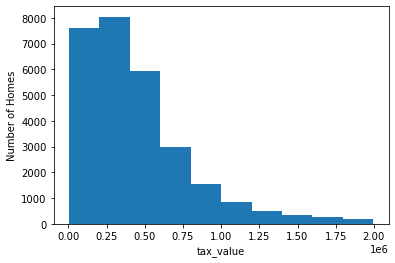

In [9]:
plt.hist(y_train)
plt.xlabel('tax_value')
plt.ylabel('Number of Homes')
plt.show()

In [15]:
# Make these dataframes to allow for baselines to be appended
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# Predict mean
tax_value_pred_mean_train = y_train.tax_value.mean()
tax_value_pred_mean_validate = y_validate.tax_value.mean()
y_train['tax_value_pred_mean_train'] = tax_value_pred_mean_train
y_validate['tax_value_pred_mean_validate'] = tax_value_pred_mean_validate

# Predict median
tax_value_pred_median_train = y_train.tax_value.median()
tax_value_pred_median_validate = y_validate.tax_value.median()
y_train['tax_value_pred_median_train'] = tax_value_pred_median_train
y_validate['tax_value_pred_median_validate'] = tax_value_pred_median_validate

# RMSE of tax_value pred mean

rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean_train, squared = False)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean_validate, squared = False)

print(f"RMSE using Mean Train Sample: {round(rmse_train,2)}")
print(f"RMSE using Mean Validate Sample: {round(rmse_validate,2)}")

# RMSE of tax_value pred median

rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median_train, squared = False)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median_validate, squared = False)

print(f"RMSE using Median Train Sample: {round(rmse_train,2)}")
print(f"RMSE using Median Validate Sample: {round(rmse_validate,2)}")

RMSE using Mean Train Sample: 352484.46
RMSE using Mean Validate Sample: 357952.04
RMSE using Median Train Sample: 361369.74
RMSE using Median Validate Sample: 367103.56


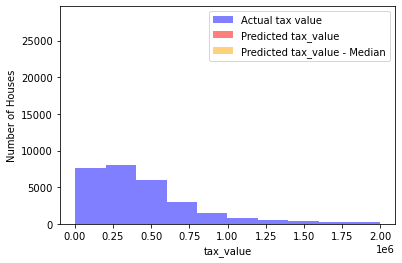

In [16]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tax_value, color='blue', alpha=.5, label="Actual tax value")
plt.hist(y_train.tax_value_pred_mean_train, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted tax_value")
plt.hist(y_train.tax_value_pred_median_train, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted tax_value - Median")
plt.xlabel("tax_value")
plt.ylabel("Number of Houses")
plt.legend()
plt.show()

#### Linear Regression (OLS):

- Fit model using X_train_scaled and labels from y_train
- Predict tax_value scores using training sample using lm model
- Evaluate using RMSE
- Repeat predictions and evaluations for validation
- Compare RMSE train vs validation to check for overfitting.

In [18]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm, squared=False)

# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm, squared=False)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  286640.3755895617 
Validation/Out-of-Sample:  287347.81489021715


In [19]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars, squared=False)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars, squared=False)

print("RMSE for OLS using Lasso+Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using Lasso+Lars
Training/In-Sample:  286640.6193470093 
Validation/Out-of-Sample:  287355.7692965073


In [20]:
# create the model object
glm = TweedieRegressor(power=1,alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm, squared=False)

# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm, squared=False)

print("RMSE for OLS using Tweedie, power=1 alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using Tweedie, power=1 alpha=0
Training/In-Sample:  299949.7669131965 
Validation/Out-of-Sample:  295501.90201605257


In [21]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [22]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2)**(1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  285010.79848812235 
Validation/Out-of-Sample:  286890.44317933824


In [ ]:
y_validate.tax_value_pred_mean

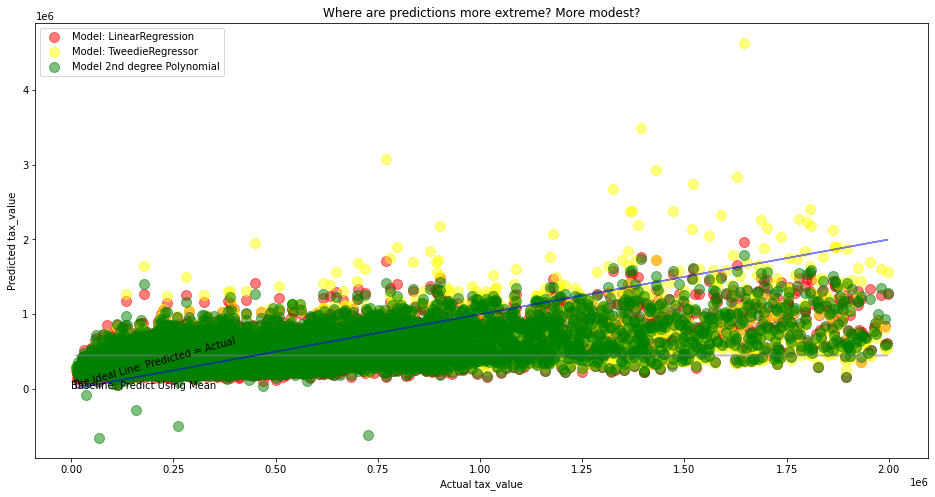

In [24]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.tax_value_pred_mean_validate, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual tax_value")
plt.ylabel("Predicted tax_value")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()